#  Теория вероятностей и математическая статистика

In [91]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
from scipy import stats
import statistics
from sklearn.linear_model import LinearRegression

plt.style.use('seaborn-whitegrid')
%config InlineBackend.figure_formats = ['svg']

In [92]:
def statistic(samples: np.ndarray) -> float:
    return (samples.mean() - 1) / (samples.std(ddof=1) / np.sqrt(samples.shape[0]))

In [93]:
def sum_of_squares(samples: np.ndarray) -> float:
    """Сумма квадратов отклонений.
    """
    
    return ((samples - samples.mean()) ** 2).sum()

## Домашнее задание 7

**Задача 1**

Дана матрица объект-признак
```
X = [[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]]
```
и значения целевой переменной
```
y = [ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218]
```

Подберите два признака (из четырёх) так, чтобы уровень линейной зависимости целевой переменной от значений этих признаков был максимальным. Другими словами, модель линейной регрессии на этих признаках должна давать наилучший результат. В качестве ответа запишите значение коэффициента детерминации для модели на этих признаках.


**Решение**

In [94]:
X = np.array([[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
     [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
     [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
     [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
     [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
     [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
     [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
     [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
     [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
     [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]])
X

array([[ 1.22401313,  2.30868478,  3.03636353,  2.69287214],
       [-0.18757272,  1.30337355,  5.12093014,  3.46363202],
       [-0.81094525,  1.82463398,  5.79686488,  1.86159445],
       [ 0.75129018,  2.67392052,  3.65529809,  1.66746094],
       [ 0.00972362,  1.97367255,  2.50594319,  1.69755173],
       [-0.62972637,  0.77750764,  2.84124027,  4.54410559],
       [ 2.29536229,  1.81206697,  1.95026215,  1.51874636],
       [ 0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
       [ 2.39252799,  3.17563985,  3.61420599,  5.10773362],
       [ 0.54983815,  2.87988651,  1.65752765,  1.59635987]])

In [95]:
y = np.array([ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
      7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218])
y

array([ 9.26193358,  9.700363  ,  8.67214805,  8.74796974,  6.18689108,
        7.53312713,  7.57643777, 12.44965478, 14.29010746,  6.68361218])

In [96]:
X.shape, y.shape

((10, 4), (10,))

In [97]:
ones = np.ones((X.shape[0], 1))
X_cor = np.hstack((ones, X))
X_cor

array([[ 1.        ,  1.22401313,  2.30868478,  3.03636353,  2.69287214],
       [ 1.        , -0.18757272,  1.30337355,  5.12093014,  3.46363202],
       [ 1.        , -0.81094525,  1.82463398,  5.79686488,  1.86159445],
       [ 1.        ,  0.75129018,  2.67392052,  3.65529809,  1.66746094],
       [ 1.        ,  0.00972362,  1.97367255,  2.50594319,  1.69755173],
       [ 1.        , -0.62972637,  0.77750764,  2.84124027,  4.54410559],
       [ 1.        ,  2.29536229,  1.81206697,  1.95026215,  1.51874636],
       [ 1.        ,  0.0920418 ,  2.26971361,  7.47708735,  2.61081203],
       [ 1.        ,  2.39252799,  3.17563985,  3.61420599,  5.10773362],
       [ 1.        ,  0.54983815,  2.87988651,  1.65752765,  1.59635987]])

In [98]:
XTX = X_cor.T.dot(X_cor)
XTX

array([[ 10.        ,   5.68655282,  20.99909996,  37.65572324,
         26.76086875],
       [  5.68655282,  14.45578256,  16.18970672,  13.75963817,
         16.36899923],
       [ 20.99909996,  16.18970672,  48.82147094,  77.94638231,
         54.96579726],
       [ 37.65572324,  13.75963817,  77.94638231, 172.28091363,
        103.55453384],
       [ 26.76086875,  16.36899923,  54.96579726, 103.55453384,
         86.78508203]])

In [99]:
XTX_inv = np.linalg.inv(XTX)

b = XTX_inv.dot(X_cor.T).dot(y)

b

array([-7.50726681e-09,  1.00000000e+00,  1.00000000e+00,  9.99999999e-01,
        1.00000000e+00])

In [100]:
z = X_cor.dot(b)
z

array([ 9.26193358,  9.70036299,  8.67214805,  8.74796973,  6.18689109,
        7.53312713,  7.57643777, 12.44965479, 14.29010746,  6.68361218])

In [101]:
e = y - z

e

array([-2.19215579e-09,  1.12569971e-08, -2.99833403e-09,  1.17577148e-08,
       -7.04762204e-09, -2.13777973e-09, -1.58272329e-09, -5.99781558e-09,
       -1.61772640e-09,  5.59380986e-10])

In [102]:
e.mean()

-6.394884621840902e-15

In [103]:
lr = LinearRegression(fit_intercept=False).fit(X_cor, y)

b, lr.coef_

(array([-7.50726681e-09,  1.00000000e+00,  1.00000000e+00,  9.99999999e-01,
         1.00000000e+00]),
 array([-7.50728087e-09,  1.00000000e+00,  1.00000000e+00,  9.99999999e-01,
         1.00000000e+00]))

In [104]:
R = 1 - sum_of_squares(e) / sum_of_squares(y)
R

1.0

In [105]:
np.corrcoef(y, z) ** 2

array([[1., 1.],
       [1., 1.]])

Ответ: не поняла, как подбирать оценки по паре признаков. на всех рассчитанных оценка получается равной 1

**Задача 2**

Является ли значимым уравнение регрессии, полученное в предыдущей задаче? В качестве ответа запишите 1, если является, и 0 иначе.

In [106]:
R_norm = 0.9 #в моем расчете получилась единица, взяла меньше, тк на 0 не делится
n = X.shape[0]
m = X.shape[1]

k1 = m
k2 = n - m - 1

n, m, k1, k2

(10, 4, 4, 5)

In [107]:
alpha = 0.05

t = stats.f.ppf(1 - alpha, k1, k2)
t

5.192167772803923

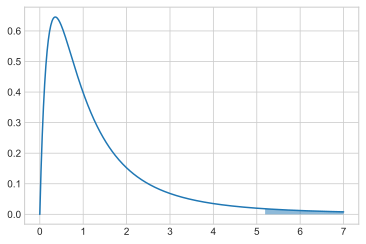

In [108]:
ox = np.linspace(0, 7, 500)
oy = stats.f.pdf(ox, k1, k2)

ox_right = np.linspace(t, 7, 100)
oy_right = stats.f.pdf(ox_right, k1, k2)

plt.plot(ox, oy)
plt.fill_between(ox_right, oy_right, alpha=0.5)

In [109]:
F = (R_norm / k1) / ((1 - R_norm) / k2)
F

11.250000000000002

Статистика попала в критическую область, уравнение регрессии признаётся значимым.
Ответ 1

**Задача 3**

Для проведения A/B-тестирования сайта интернет-магазина были получены следующие данные: страница `A` была посещена 2509 раз, из них 77 закончились совершением покупки, страница `B` была посещена 1465 раз, 60 из них закончились совершением покупки. Является ли значимым отличие конверсии на страницах `A` и `B`? В качестве ответа запишите 1, если является, и 0 иначе.

_Подсказка_. Реализуйте двухвыборочный t-тест. В качестве выборок здесь можно взять наборы меток совершения покупки (0 или 1) каждым посетителем.

**Решение**

In [69]:
#Нулевая гипотеза, что конверсия не отличается.
a = 2509
a_rez = 77
b = 1465
b_rez = 60

In [81]:
x = np.zeros(a)
x[0:a_rez] = 1
x

array([1., 1., 1., ..., 0., 0., 0.])

In [82]:
y = np.zeros(b)
y[0:b_rez] = 1
y

array([1., 1., 1., ..., 0., 0., 0.])

In [83]:
n1 = x.size
n2 = y.size

s1 = x.std(ddof=1)
s2 = y.std(ddof=1)

In [84]:
s_delta = np.sqrt(s1 ** 2 / n1 + s2 ** 2 / n2)
s_delta

0.006220171278295827

In [85]:
t = (x.mean() - y.mean()) / s_delta

t

-1.6504551408398205

In [86]:
df = (s1 ** 2 / n1 + s2 ** 2 / n2) ** 2 / \
    ((s1 ** 2 / n1) ** 2 / (n1 - 1) + (s2 ** 2 / n2) ** 2 / (n2 - 1))

df

2732.8025644352133

In [87]:
alpha = 0.05

t1 = stats.t.ppf(alpha / 2, df=df)
t2 = stats.t.ppf(1 - alpha / 2, df=df)

t1, t2

(-1.9608324352746576, 1.9608324352746571)

In [88]:
stats.ttest_ind(x, y, equal_var=False)

Ttest_indResult(statistic=-1.6504551408398205, pvalue=0.09896479217925898)

Ответ: pvalue > уровня значимости, значит гипотезу принимаем.
ответ 0